In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

stud_math = pd.read_csv('https://raw.githubusercontent.com/DShev1982/skillfactory/master/data%20for%20projects/stud_math.xls')

In [250]:
display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [251]:
#сколько числовых и номинативных столбцов
dtypes = stud_math.dtypes
dtypes.groupby(dtypes == 'object').count()

False    13
True     17
dtype: int64

13 - числовых столбцов.
17 - номинативных столбцов.

Не понимаю смысла столбца 'studytime, granular', в описании задания вообще нет такого столбца => удаляю столбец из выборки.

In [323]:
stud_math.drop(columns=["studytime, granular"], inplace = True)

## Рассмотрим столбцы

### Рассмотрим столбец school

In [252]:
display(stud_math.school.value_counts())
stud_math.loc[:,['school']].info()

GP    349
MS     46
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пропусков нет, всего 2 школы. Оставляем данные в столбце, как есть.

### Рассмотрим столбец sex

In [253]:
display(stud_math.sex.value_counts())
stud_math.loc[:,['sex']].info()

F    208
M    187
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пропусков нет. Оставляем данные в столбце, как есть.

### Рассмотрим столбец age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

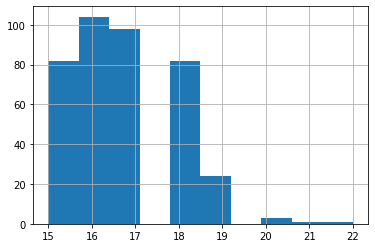

In [254]:
stud_math.age.hist()
stud_math.age.describe()

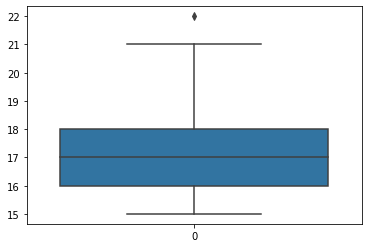

In [255]:
sns.boxplot(data = stud_math.age)

Пропусков нет. Есть один выброс, но он не сильно отстоит от основного распределения, но данные сильно не влияет, можно оставить, как есть.


### Рассмотрим столбец address

In [256]:
display(stud_math.address.value_counts())
stud_math.loc[:,['address']].info()

U    295
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Всего 2 значения. Пропусков мало: 4% (17/395) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть. В дальнейшем можно будет заполнить преобладающим значением "U"

### Рассмотрим столбец famsize

In [257]:
display(stud_math.famsize.value_counts())
stud_math.loc[:,['famsize']].info()

GT3    261
LE3    107
Name: famsize, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Всего 2 значения. Пропусков мало: 7% (27/395) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть. В дальнейшем можно будет заполнить преобладающим значением "GT3"

### Рассмотрим столбец Pstatus

In [258]:
display(stud_math.Pstatus.value_counts())
stud_math.loc[:,['Pstatus']].info()

T    314
A     36
Name: Pstatus, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Всего 2 значения. Пропусков - 11% (45/395) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть. В дальнейшем можно будет заполнить преобладающим значением "T"

### Рассмотрим столбец Medu

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

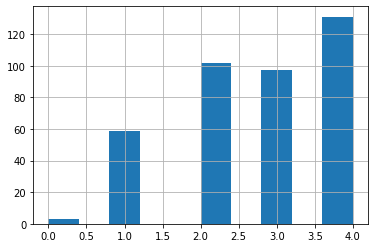

In [259]:
stud_math.Medu.hist()
stud_math.Medu.describe()

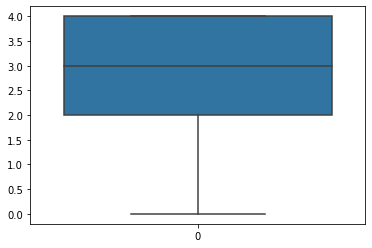

In [260]:
sns.boxplot(data = stud_math.Medu)

Есть всего 3 пропуска, меньше 1% от общего числа, некритично. Выбросов нет

### Рассмотрим столбец Fedu

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

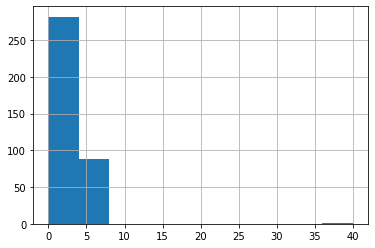

In [261]:
stud_math.Fedu.hist()
stud_math.Fedu.describe()

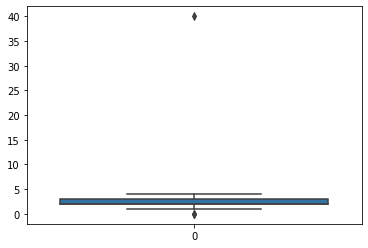

In [262]:
sns.boxplot(data = stud_math.Fedu)

Есть выброс равный 40. Такого быть не должно. Параметр принимает значения только из списка [1,2,3,4] => явная ошибка данных => исправляем данные в столбце

In [263]:
stud_math = stud_math[stud_math.Fedu <= 4]

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

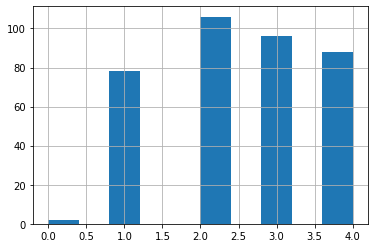

In [264]:
stud_math.Fedu.hist()
stud_math.Fedu.describe()

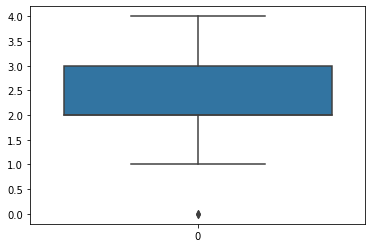

In [265]:
sns.boxplot(data = stud_math.Fedu)

После исправления данные стали корректными, есть 1 выброс, но его значение корректно и т.к всего 2 строки с таким значением, на общий результат этот выброс сильно не повлияет, оставляю.

### Рассмотрим столбец Mjob

In [277]:
display(stud_math.Mjob.value_counts())
stud_math.loc[:,['Mjob']].info()

other       125
services     90
at_home      57
teacher      48
health       31
Name: Mjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    351 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


Всего 5 уникальных значений. Пропусков - 5% (19/370) от общего числа. Не понятно, как пропуски заполнять => оставляю, как есть.

In [81]:
19/370

0.051351351351351354

### Рассмотрим столбец Fjob

In [267]:
display(stud_math.Fjob.value_counts())
stud_math.loc[:,['Fjob']].info()

other       189
services     94
teacher      26
at_home      14
health       13
Name: Fjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    336 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


Всего 5 уникальных значений. Пропусков - 9% (34/370) от общего числа. Не понятно, как пропуски заполнять => оставляю, как есть.

In [82]:
34/370

0.0918918918918919

### Рассмотрим столбец reason

In [268]:
display(stud_math.reason.value_counts())
stud_math.loc[:,['reason']].info()

course        128
reputation     98
home           96
other          32
Name: reason, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  354 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


Всего 4 уникальных значения. Пропусков - 4% (16/370) от общего числа. Не понятно, как пропуски заполнять => оставляю, как есть.

In [85]:
16/370

0.043243243243243246

### Рассмотрим столбец guardian

In [269]:
display(stud_math.guardian.value_counts())
stud_math.loc[:,['guardian']].info()

mother    236
father     78
other      26
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  340 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


Всего 3 уникальных значения. Пропусков - 8% (30/370) от общего числа. Пока не понятно, влияет ли этот параметр на score. Оставляю, как есть.

In [84]:
30/370

0.08108108108108109

### Рассмотрим столбец traveltime

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

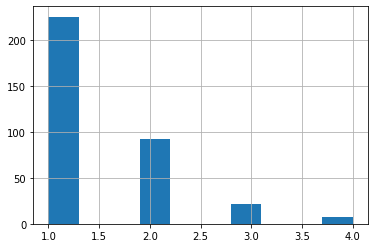

In [270]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

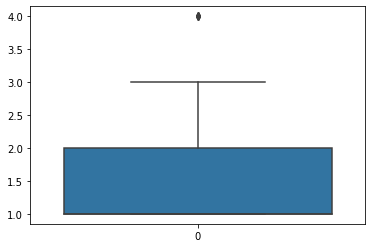

In [271]:
sns.boxplot(data = stud_math.traveltime)

In [272]:
stud_math[stud_math.traveltime >= 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,...,-3.0,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,...,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
149,GP,M,15,U,LE3,NaN,2.0,1.0,services,other,...,-3.0,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,...,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
228,GP,M,18,U,NaN,T,2.0,1.0,at_home,other,...,-6.0,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
327,GP,M,17,R,GT3,T,2.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,...,-9.0,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0


Есть выбросы, но значение выброса не сильно отстоит от основных значений. Также количество выбросов невелико => оставляю выбросы в данных.

### Рассмотрим столбец studytime

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

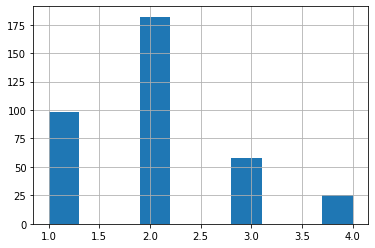

In [273]:
stud_math.studytime.hist()
stud_math.studytime.describe()

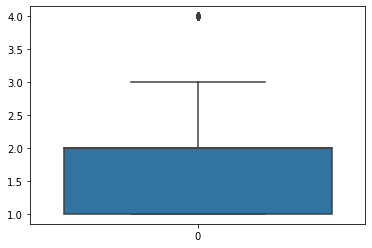

In [274]:
sns.boxplot(data = stud_math.studytime)

In [275]:
stud_math[stud_math.studytime >= 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,...,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,...,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
69,GP,F,15,R,LE3,T,3.0,1.0,other,other,...,-12.0,yes,yes,no,4.0,4.0,2.0,3.0,12.0,80.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,...,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
71,GP,M,15,U,GT3,T,4.0,2.0,other,other,...,-12.0,yes,yes,no,3.0,3.0,3.0,3.0,0.0,50.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,...,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,...,-12.0,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,...,-12.0,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,...,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0
105,GP,F,15,U,GT3,A,3.0,3.0,other,health,...,-12.0,yes,no,no,4.0,3.0,3.0,4.0,10.0,55.0


Есть выбросы, но значение выброса не сильно отстоит от основных значений. Также количество выбросов сравнительно невелико => оставляю выбросы в данных.

### Рассмотрим столбец failures

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

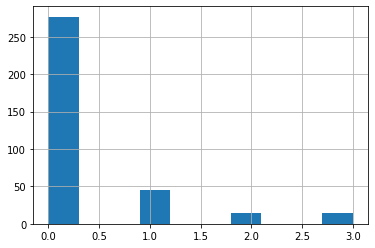

In [276]:
stud_math.failures.hist()
stud_math.failures.describe()

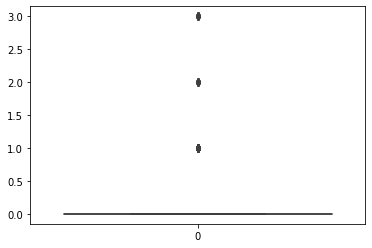

In [37]:
sns.boxplot(data = stud_math.failures)

Есть выбросы, но их значение корректно, количество суммарно - заметно (value_counts() показывает, что количество выбросов - failures in [1,2,3] - 74). Оставляю выбросы в выборке

In [79]:
stud_math.failures.value_counts()

0.0    277
1.0     45
3.0     15
2.0     14
Name: failures, dtype: int64

### Рассмотрим столбец schoolsup

In [278]:
display(stud_math.schoolsup.value_counts())
stud_math.loc[:,['schoolsup']].info()

no     314
yes     47
Name: schoolsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  361 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [86]:
9/370

0.024324324324324326

Всего 2 значения. Пропусков - 2% (9/370) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть.

### Рассмотрим столбец famsup

In [279]:
display(stud_math.famsup.value_counts())
stud_math.loc[:,['famsup']].info()

yes    204
no     131
Name: famsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  335 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [87]:
35/370

0.0945945945945946

Всего 2 значения. Пропусков - 9% (35/370) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть.

### Рассмотрим столбец paid

In [280]:
display(stud_math.paid.value_counts())
stud_math.loc[:,['paid']].info()

no     188
yes    145
Name: paid, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    333 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [91]:
round(1 - stud_math.paid.count()/stud_math.paid.size,2)

0.1

Всего 2 значения. Пропусков - 10% (расчет выше) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть.

### Рассмотрим столбец activities

In [281]:
display(stud_math.activities.value_counts())
stud_math.loc[:,['activities']].info()

yes    180
no     176
Name: activities, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  356 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [282]:
round(1 - stud_math.activities.count()/stud_math.activities.size,2)

0.04

Всего 2 значения. Пропусков - 4% (расчет выше) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть.

### Рассмотрим столбец nursery

In [283]:
display(stud_math.nursery.value_counts())
stud_math.loc[:,['nursery']].info()

yes    279
no      75
Name: nursery, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  354 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [284]:
round(1 - stud_math.nursery.count()/stud_math.nursery.size,2)

0.04

Всего 2 значения. Пропусков - 4% (расчет выше) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть.

### Рассмотрим столбец higher

In [285]:
display(stud_math.higher.value_counts())
stud_math.loc[:,['higher']].info()

yes    333
no      19
Name: higher, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  352 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [286]:
round(1 - stud_math.higher.count()/stud_math.higher.size,2)

0.05

Всего 2 значения. Преобладающее большинство у "yes" Пропусков - 5% (расчет выше) от общего числа. Пока оставляю, как есть. В будуще, возможно, заполню недостающие "yes".

### Рассмотрим столбец internet

In [287]:
display(stud_math.internet.value_counts())
stud_math.loc[:,['internet']].info()

yes    283
no      54
Name: internet, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  337 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [288]:
column = 'internet'

In [289]:
round(1 - stud_math[column].count()/stud_math[column].size,2)

0.09

Всего 2 значения. Пропусков - 9% (расчет выше) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость => пока оставляю, как есть.

### Рассмотрим столбец romantic

In [290]:
display(stud_math.romantic.value_counts())
stud_math.loc[:,['romantic']].info()

no     226
yes    116
Name: romantic, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  342 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [291]:
column = 'romantic'

In [293]:
round(1 - stud_math[column].count()/stud_math[column].size,2)

0.08

Всего 2 значения. Пропусков - 8% (расчет выше) от общего числа. Пока не понятно, насколько этот параметр вообще влияет на успеваемость + как заполнять пропущенные => пока оставляю, как есть.

### Рассмотрим столбец famrel

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

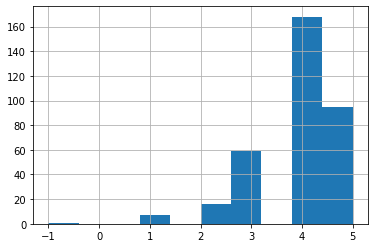

In [294]:
stud_math.famrel.hist()
stud_math.famrel.describe()

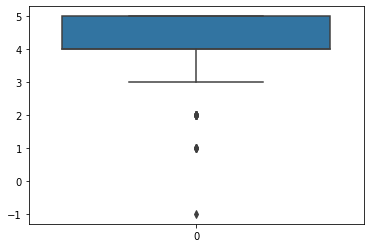

In [295]:
sns.boxplot(data = stud_math.famrel)

Есть выброс равный -1. Такого быть не должно. Параметр принимает значения только из списка [1,2,3,4,5] => явная ошибка данных => исправляем данные в столбце

In [296]:
stud_math = stud_math[(stud_math.famrel >= 1)&(stud_math.famrel <= 5)]

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

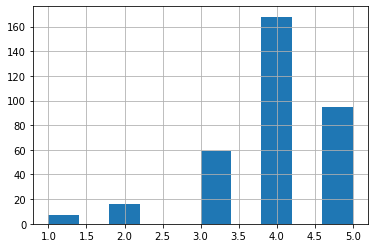

In [297]:
stud_math.famrel.hist()
stud_math.famrel.describe()

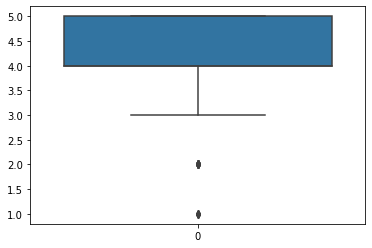

In [298]:
sns.boxplot(data = stud_math.famrel)

In [299]:
stud_math.famrel.value_counts()

4.0    168
5.0     95
3.0     59
2.0     16
1.0      7
Name: famrel, dtype: int64

In [116]:
stud_math.famrel.describe()

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Есть выбросы, но их значение корректно, количество суммарно незначительно (value_counts() показывает, что количество выбросов - failures in [1,2] - 23 из общего числа 345). Оставляю выбросы в выборке

### Рассмотрим столбец freetime

count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

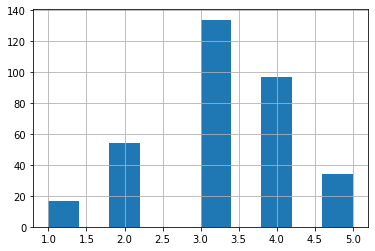

In [300]:
stud_math.freetime.hist()
stud_math.freetime.describe()

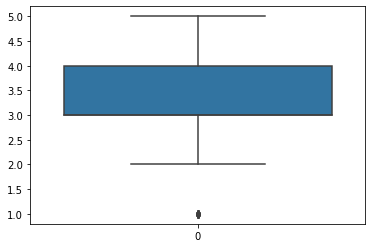

In [301]:
sns.boxplot(data = stud_math.freetime)

In [302]:
stud_math.freetime.value_counts()

3.0    134
4.0     97
2.0     54
5.0     34
1.0     17
Name: freetime, dtype: int64

Есть выбросы, но их значение корректно, количество суммарно незначительно (value_counts() показывает, что количество выбросов - failures in [1] - 17 из общего числа 336). Оставляю выбросы в выборке

### Рассмотрим столбец goout

count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

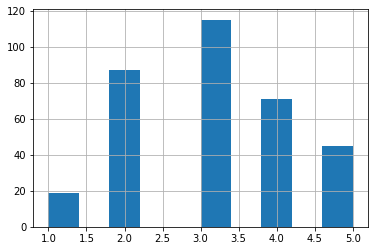

In [303]:
stud_math.goout.hist()
stud_math.goout.describe()

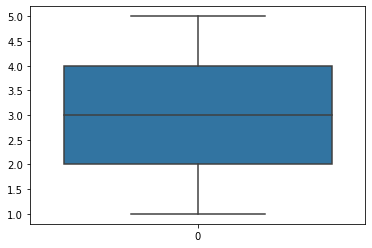

In [304]:
sns.boxplot(data = stud_math.goout)

Выбросов нет, оставляю, как есть

### Рассмотрим столбец health

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

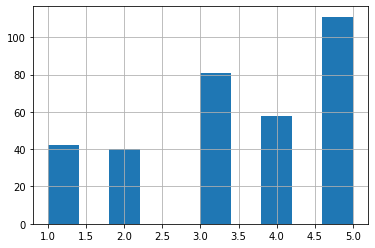

In [305]:
stud_math.health.hist()
stud_math.health.describe()

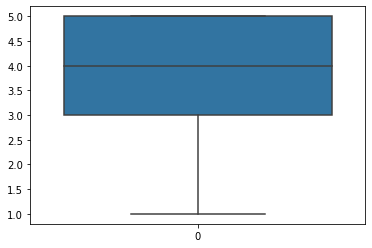

In [306]:
sns.boxplot(data = stud_math.health)

Выбросов нет, оставляю, как есть

### Рассмотрим столбец absences

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

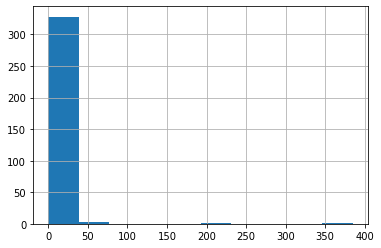

In [307]:
stud_math.absences.hist()
stud_math.absences.describe()

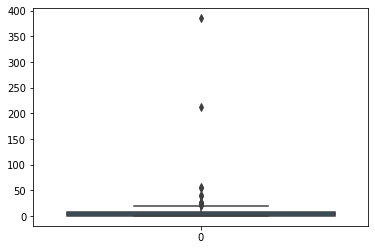

In [308]:
sns.boxplot(data = stud_math.absences)

In [309]:
stud_math.absences.value_counts().sort_index()

0.0      95
1.0       2
2.0      54
3.0       8
4.0      47
5.0       4
6.0      27
7.0       5
8.0      21
9.0       2
10.0     14
11.0      1
12.0     11
13.0      1
14.0      9
15.0      2
16.0      7
17.0      1
18.0      4
20.0      3
21.0      1
22.0      3
23.0      1
24.0      1
25.0      1
26.0      1
28.0      1
38.0      1
40.0      1
54.0      1
56.0      1
212.0     1
385.0     1
Name: absences, dtype: int64

Из гистограммы, boxplot, value_counts() (см. выше), видно, что у распределения много выбросов. При этом, как видно, основное количество значений в диапазоне [0,11], все значения свыше 22 встречаются только по 1 разу, но при этом вносят ощутимое влияние на параметры выборки (особенно такие значения, как 40, 54, 56, 212, 385) => предлагаю для очистки данных оставить только значения в диапазоне [0,22]

In [310]:
stud_math = stud_math[(stud_math.absences >= 0)&(stud_math.absences <= 22)]

count    322.000000
mean       4.736025
std        5.176198
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       22.000000
Name: absences, dtype: float64

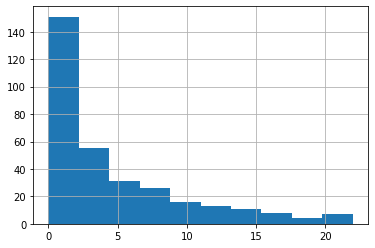

In [311]:
stud_math.absences.hist()
stud_math.absences.describe()

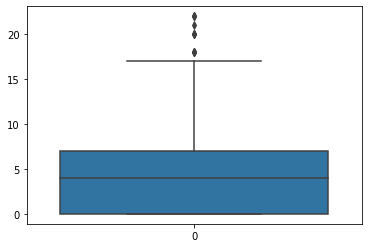

In [312]:
sns.boxplot(data = stud_math.absences)

По итогам предложенного преобразования видим, что выбросы остались, но они рядом с границей и не внесут значительного вклада в общие данные. Оставляю выбросы

### Рассмотрим столбец score

count    317.000000
mean      52.129338
std       22.546555
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

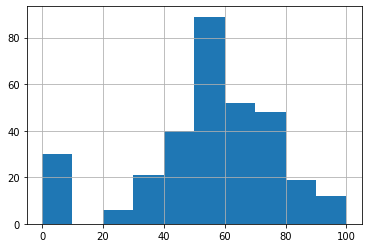

In [313]:
stud_math.score.hist()
stud_math.score.describe()

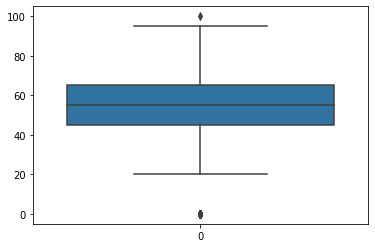

In [314]:
sns.boxplot(data = stud_math.score)

In [315]:
stud_math.score.value_counts()

50.0     50
55.0     39
0.0      30
65.0     27
60.0     25
75.0     25
70.0     23
40.0     22
45.0     18
80.0     16
30.0     13
90.0      9
35.0      8
25.0      5
85.0      3
95.0      2
100.0     1
20.0      1
Name: score, dtype: int64

In [316]:
stud_math[stud_math.score == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,...,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,...,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,...,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,...,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,...,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,...,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,...,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,...,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
148,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,...,-3.0,no,yes,yes,3.0,3.0,2.0,5.0,0.0,0.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,...,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0


Есть выбросы, смущает выборос со значением "0", как видно из value_counts() выше, 30 студентов получили 0 по экзамену, при этом ни у одного из этих студентов не было пропусков => считаю этот выброс ошибкой => удаляю из выборки.

In [317]:
stud_math = stud_math[stud_math.score > 0]

count    287.000000
mean      57.578397
std       15.710669
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

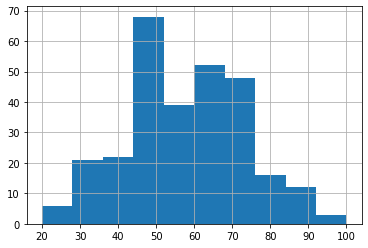

In [318]:
stud_math.score.hist()
stud_math.score.describe()

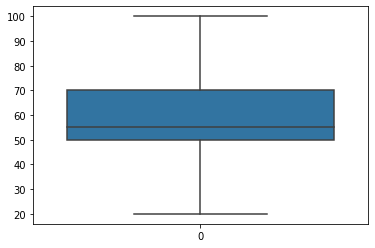

In [319]:
sns.boxplot(data = stud_math.score)

По итогам предложенного преобразования видим, что выбросов нет

### Проверим по итогу, сколько пропусков в столбцах

In [355]:
miss_columns = round(1-stud_math.count()/stud_math.shape[0],2).sort_values()
columns_dtypes = stud_math.dtypes
miss_col_with_dtypes = pd.DataFrame(dict(missed = miss_columns , dtype = columns_dtypes))
miss_col_with_dtypes.sort_values(by=['missed'])

,missed,dtype
Fedu,0.00,float64
sex,0.00,object
score,0.00,float64
school,0.00,object
absences,0.00,float64
age,0.00,int64
famrel,0.00,float64
Medu,0.01,float64
studytime,0.02,float64
freetime,0.02,float64


Как видим, максимальное количество пропущенных значений в столбце - около 11% (столбец Pstatus). При этом для числовых столбцов максимум - около 7% (столбец traveltime).

Предлагаю для дальнейшего разведывательного анализа оставить данные так, как они есть.

# Корреляционный анализ

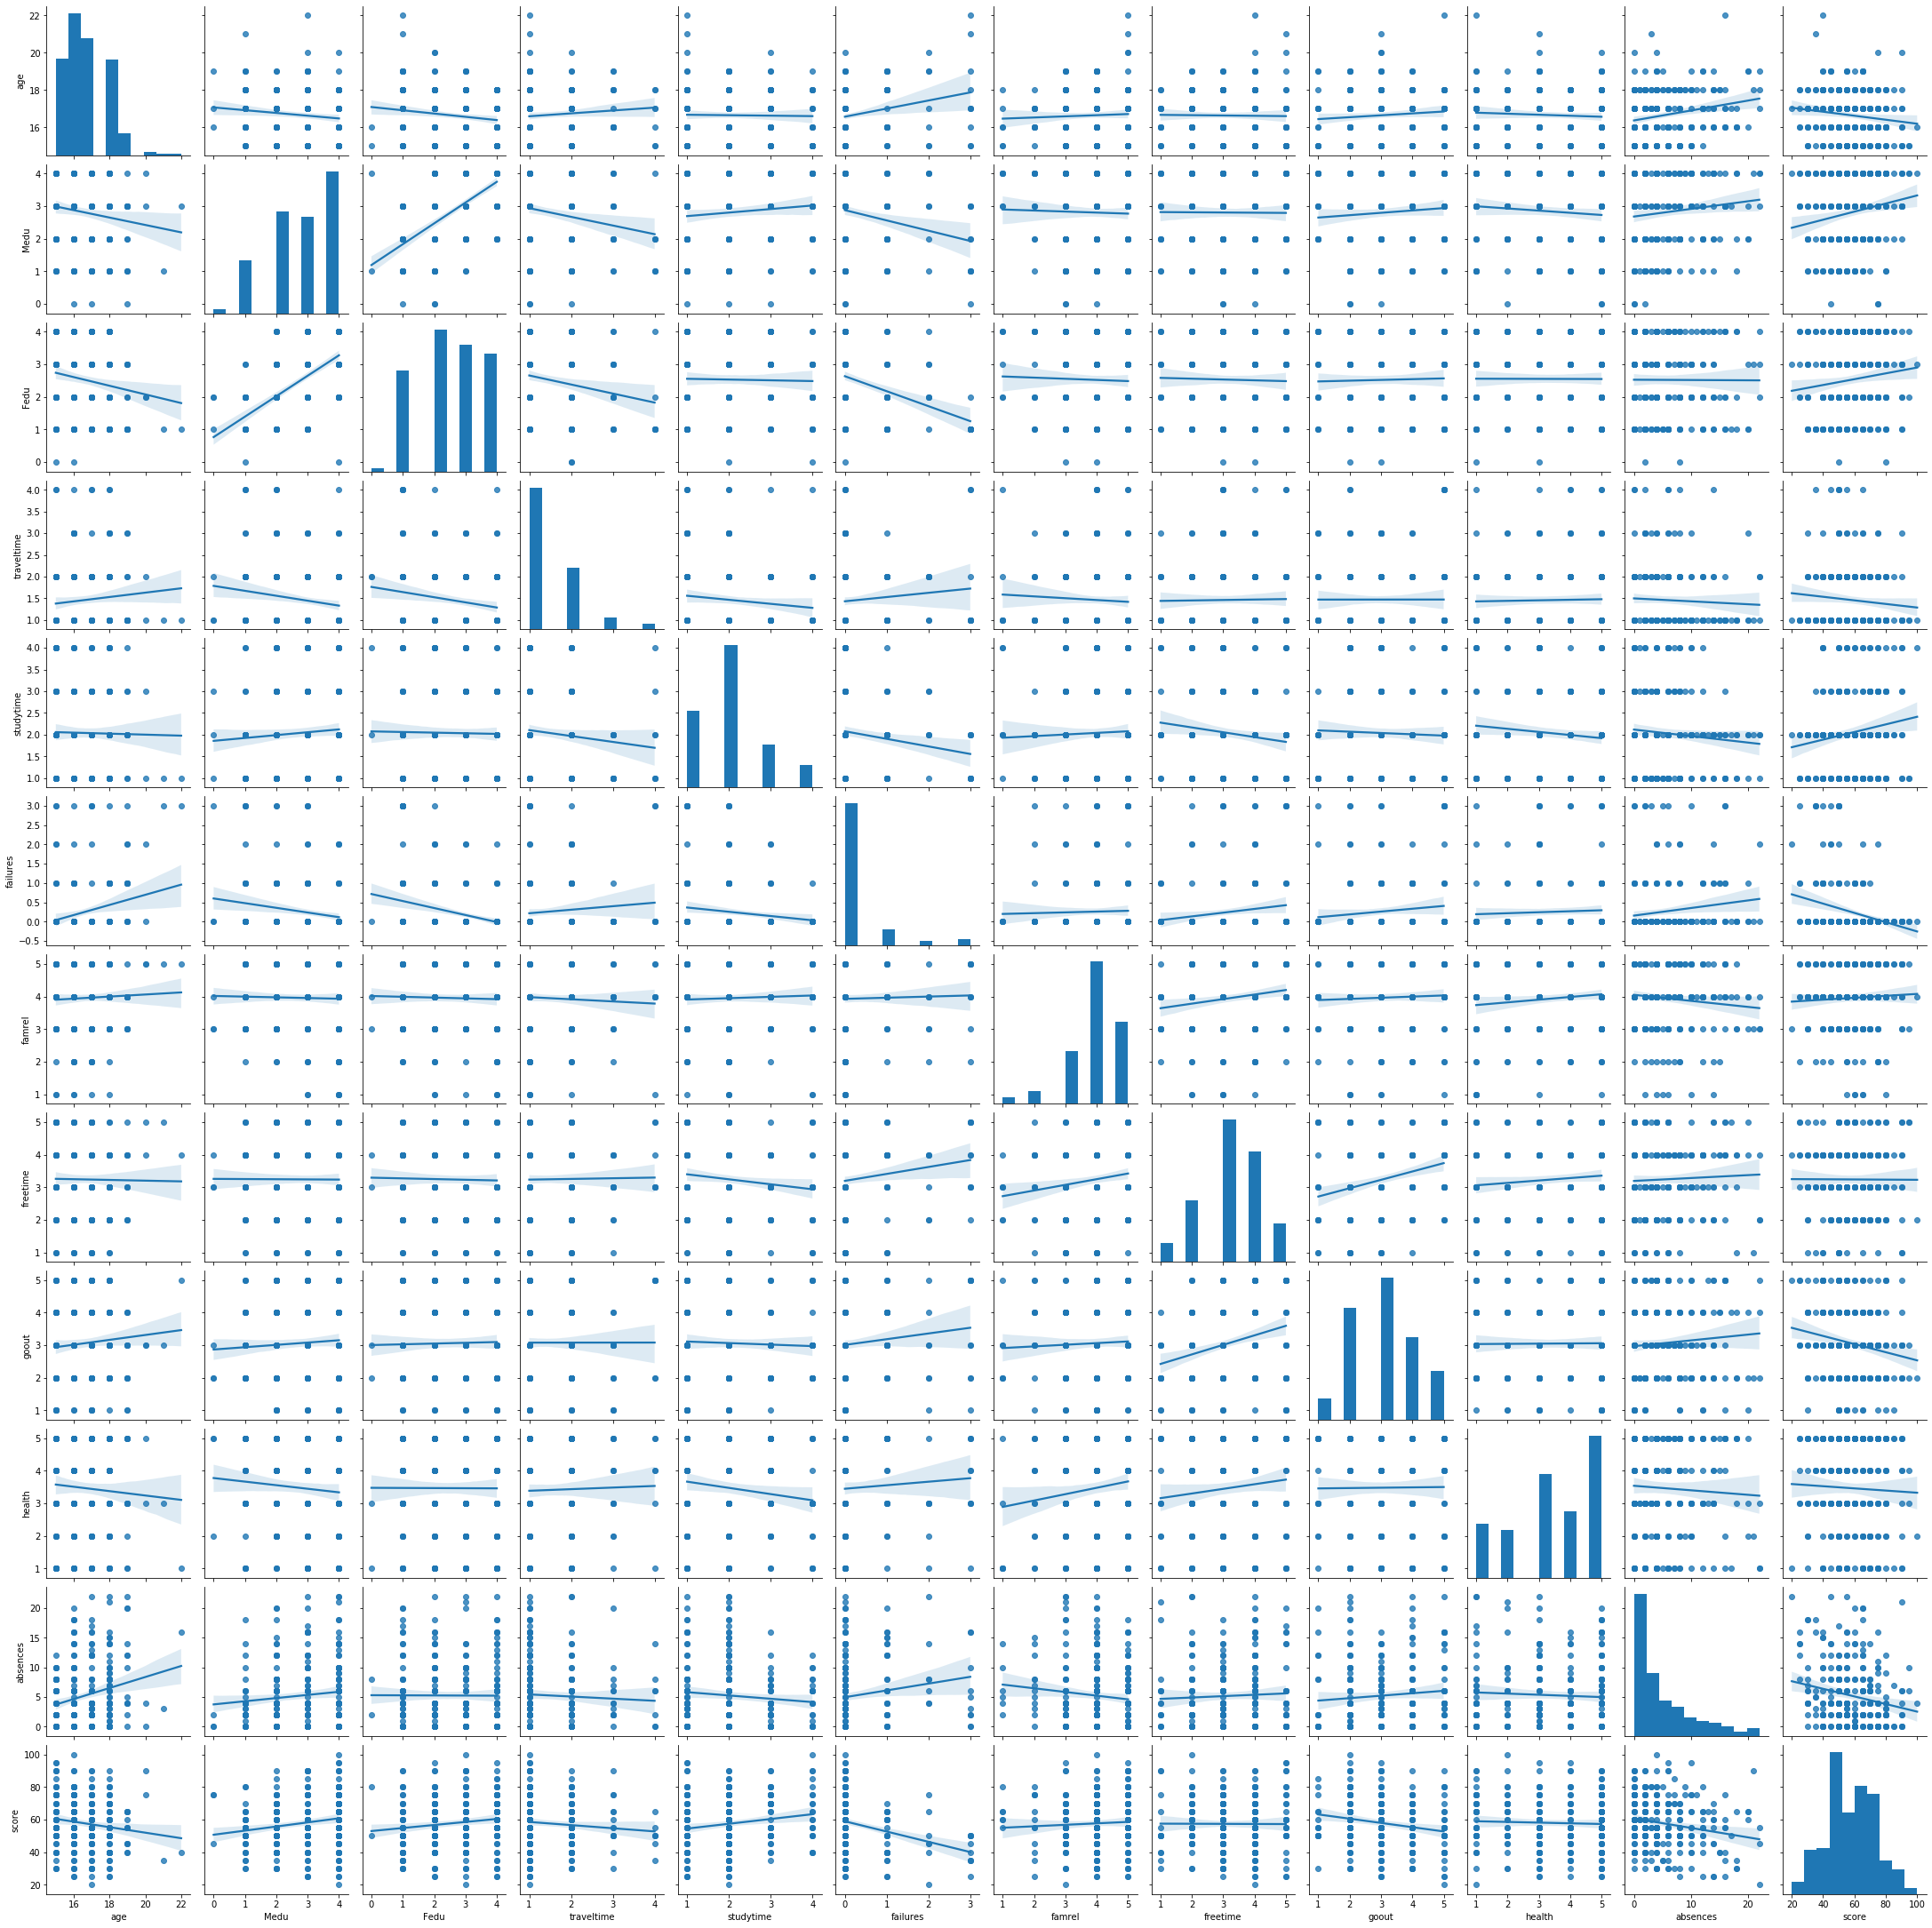

In [356]:
sns.pairplot(stud_math, kind = 'reg')

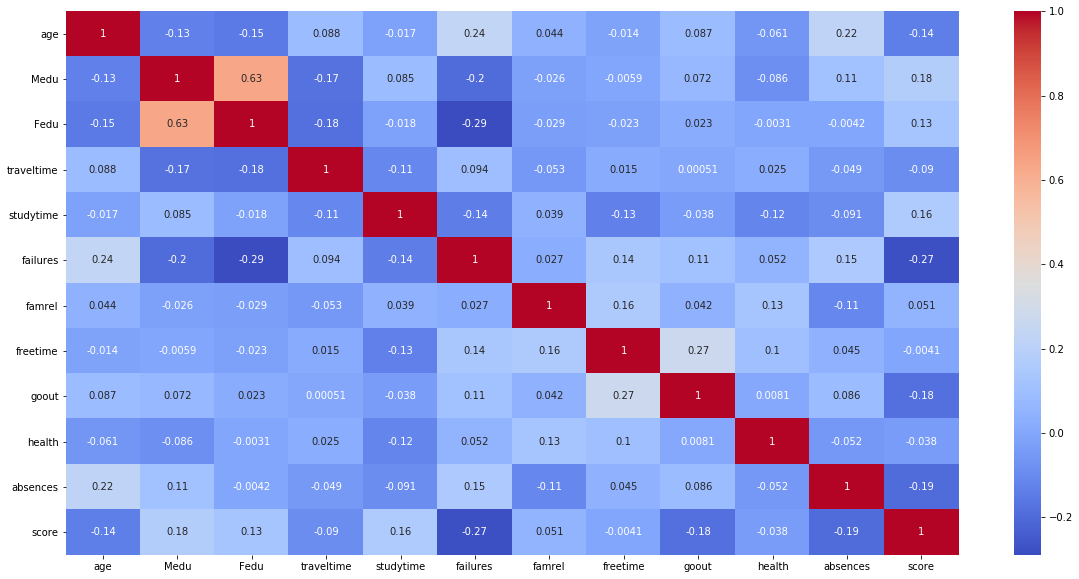

In [362]:
num_correlation = stud_math.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(num_correlation, annot = True, cmap = 'coolwarm', ax=ax)

Как видим из результатов корреляционного анализа числовых столбцов, существенно коррелированы только столбцы Medu и Fedu (уровень образования матери и отца). Для удобства предлагаю исключить столбец Fedu.

In [363]:
stud_math.drop(columns = ['Fedu'], inplace = True)

Посмотрим степень корреляции числовых столбцов со столбцом score. Корреляцию будем рассматривать по модулю, т.к. важно понять не характер корреляции (положительный или отрицательный), а степень.

In [364]:
num_correlation_abs = abs(stud_math.corr())
num_correlation_abs.loc['score'].sort_values(ascending=False)

score         1.000000
failures      0.274975
absences      0.192973
goout         0.180600
Medu          0.177088
studytime     0.160652
age           0.135037
traveltime    0.089526
famrel        0.051480
health        0.037611
freetime      0.004102
Name: score, dtype: float64

По шкале Чеддока (см. https://math.semestr.ru/corel/cheddok.php или https://statpsy.ru/correlation/velicina/) корреляция считается умеренной, при значении в диапазоне 0.3 - 0.5, при значениях в диапазоне 0.1 - 0.3 - слабой => Столбцы age, Medu, traveltime, studytime, failures, famrel, freetime, goout, health, absences можно оставить для дальнейшего анализа

### Анализ номинативных переменных

Используем функцию box-plot, чтобы посмотреть, различаются ли распределения балла в зависимости от значения номинативных переменных. 

Определим функцию get_boxplot(column)

In [233]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=stud_math, ax=ax)
    #plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [234]:
# nom_columns - номинативные столбцы, dtypes == 'object'
nom_columns = stud_math.dtypes[stud_math.dtypes == 'object'].index

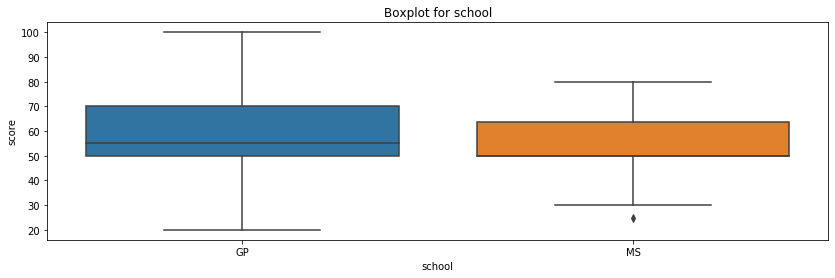

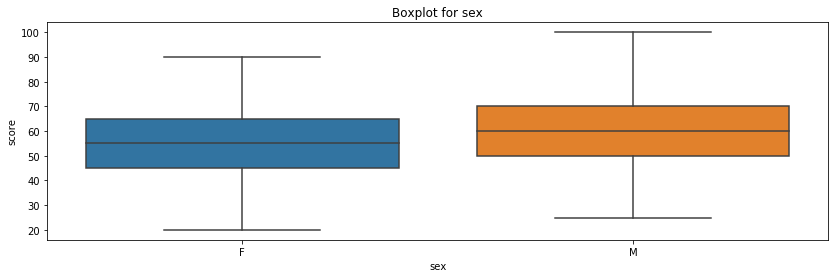

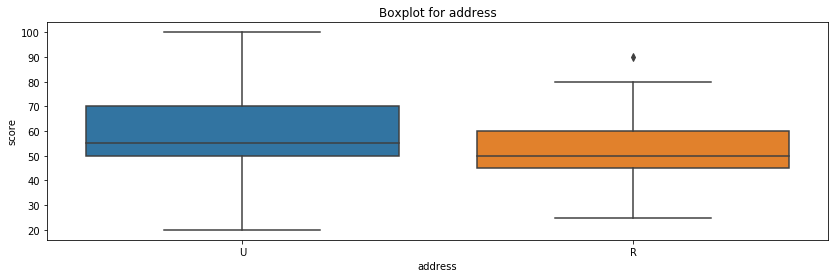

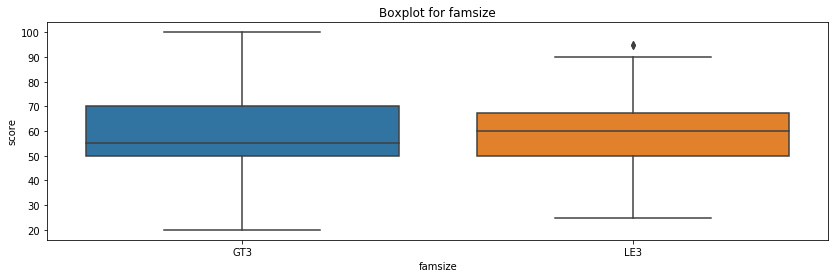

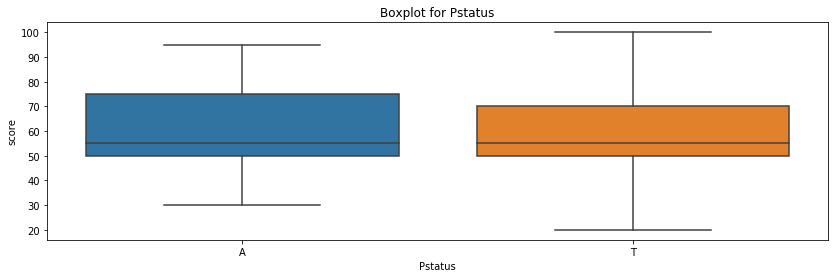

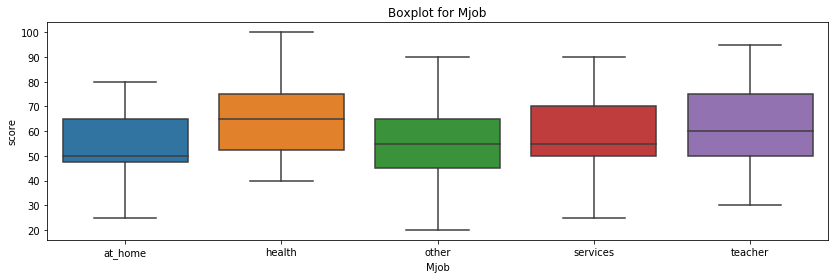

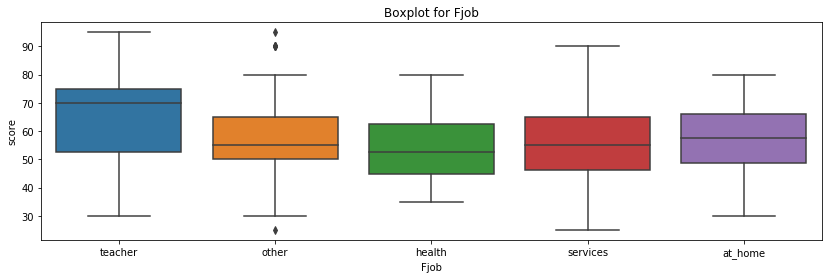

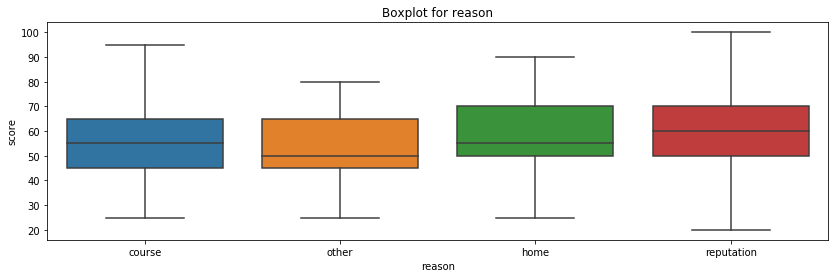

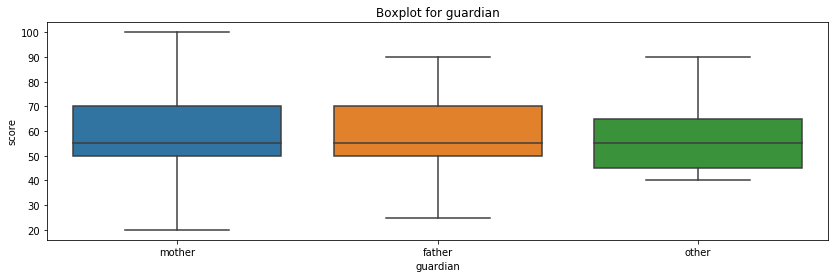

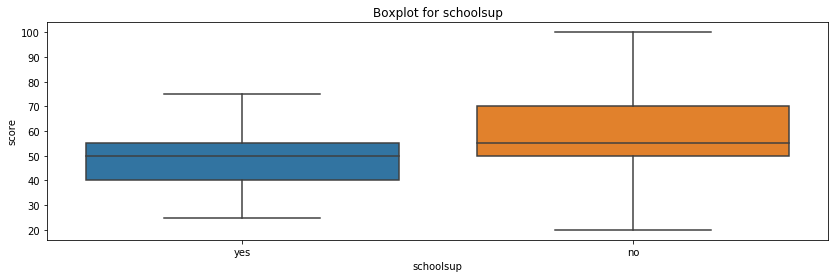

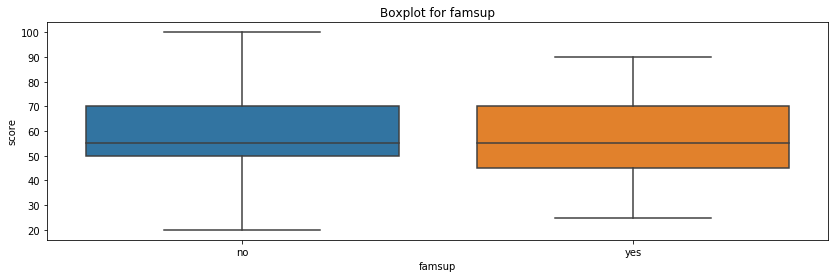

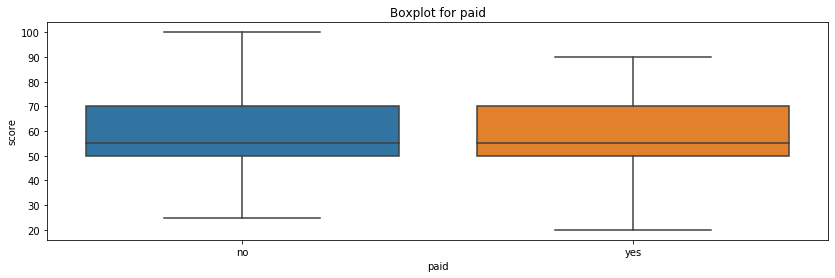

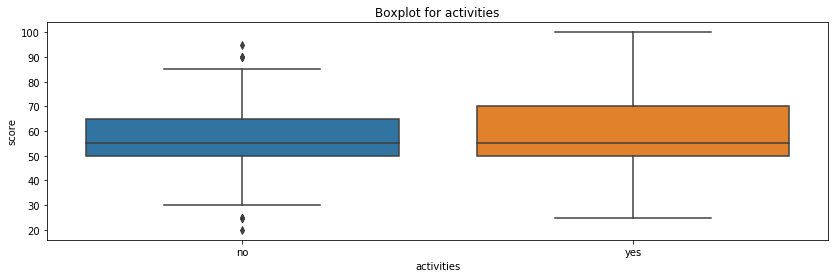

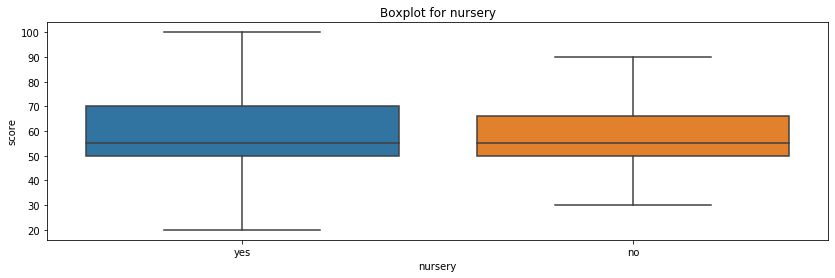

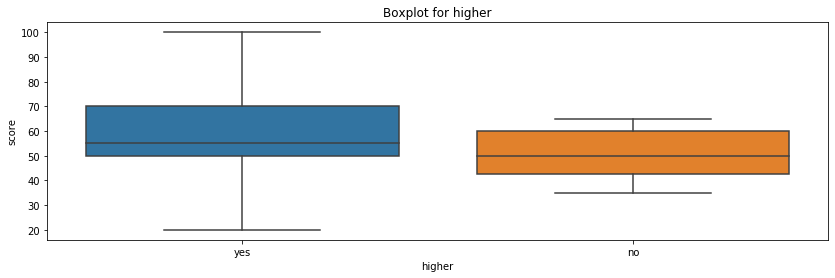

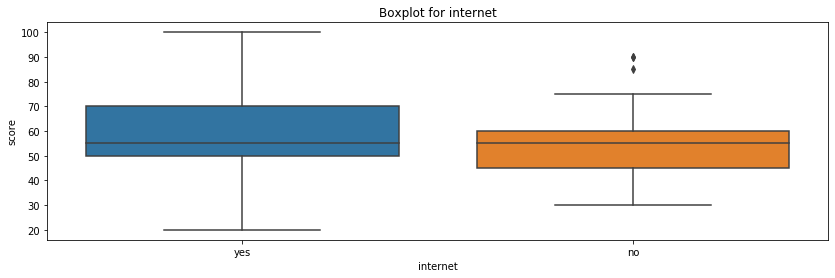

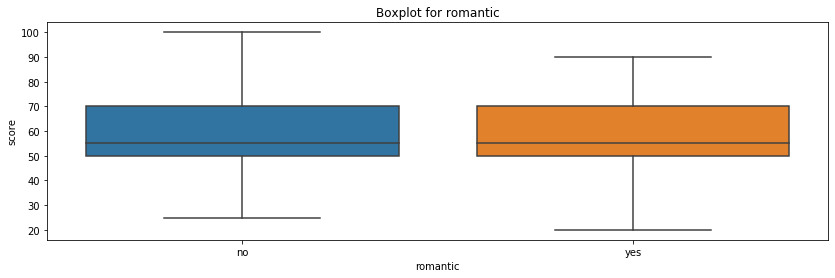

In [235]:
for col in nom_columns:
    get_boxplot(col)
    

По графикам похоже, что следующие столбцы не влияют существенно на score (очень близкие распределения для всех возможных значений в столбце):
1) famsize;
2) Pstatus;
3) guardian;
4) famsup;
5) paid;
6) activities;
7) nursery;
8) romantic;
9) school;
10) sex.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по госэкзамену по математике по различным параметрам неразличимы

In [247]:
#определим функцию get_stat_dif
def get_stat_dif(column):
    cols = stud_math[column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math[column] == comb[0], 'score'], 
                        stud_math.loc[stud_math[column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [248]:
for col in nom_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


Как видим, для построения модели целесообразно оставить переменные:
1) address;
2) Mjob;
3) schoolsup.

# Выводы

В результате EDA для анализа влияния параметров студентов на баллы по госэкзамену по математике были получены следующие выводы:

1) в данных сравнительно мало пустых значений (до 11% у номинативных столбцов, до 7% у числовых столбцов);

2) выбросы, появившиеся, т.к. при заведении данных были, скорее всего, допущены ошибки, найдены в столбцах:
2.1) Score;
2.2) absences (возможно, не ошибка, но выбросы очень сильно отличаются от выборки и влияют на выборку в целом);
2.3) Fedu.

Данные сравнительно чистые;

3) значительной (по шкале Чеддока) корреляции каких либо параметров со Score найдено не было;

4) самые важные параметры, которые предлагаю использовать в дальнейшем для построения модели, это:

4.1) числовые параметры:

4.1.1) failures (самая сильная - 0.27 - приближающаяся к умеренной по шкале Чеддока - корреляция со score);
4.1.2) absences;
4.1.3) goout;
4.1.4) Medu;
4.1.5) studytime;
4.1.6) age;
4.1.7) traveltime;
4.1.8) famrel;
4.1.9) health;
4.1.10) freetime;

4.2) номинативные параметры:

4.2.1) address;
4.2.2) Mjob;
4.2.3) schoolsup.
